In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import plotly.graph_objects as go
import math
import scipy.misc as smp

In [2]:
def DichotomyRootFinder(f, a, b, eps=10e-4):
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
    m = (a + b)/2
    if np.abs(f(m)) < eps:
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        return DichotomyRootFinder(f, m, b, eps)
    elif np.sign(f(b)) == np.sign(f(m)):
        return DichotomyRootFinder(f, a, m, eps)

In [3]:
DichotomyRootFinder(lambda x: x**2 - 2, -5, 0) - (-math.sqrt(2))

2.8992060595145475e-05

In [10]:
def NumericalIntegration(f, a, b, h = 0.001):
    integral = 0
    x = a
    while x < b:
        integral += h * f(x)
        x += h
    return integral

In [11]:
def ComplexNumericalDifferentiation(function, z0, order = 1, h = 0.01, r = 1, integrator=NumericalIntegration):

    i = complex(0, 1)
    f = lambda _phi: function(z0 + r * np.exp(i * _phi)) * np.exp(-i * order * _phi) / np.power(r, order)
    integral = integrator(f, 0, 2 * np.pi, h)
    integral /= (2 * np.pi)
    integral *= np.math.factorial(order)
    return integral

In [12]:
def RealNumericalDifferentiation(function, x0, order = 1, h = 0.01, integrator=NumericalIntegration):
    return ComplexNumericalDifferentiation(function, x0, order = 1, h = 0.01, integrator=integrator).real

In [6]:
def NewtonRootFinder(f, x0, Df = None, eps=10e-4, maxIterations=1000):
    #if Df is None: Df = lambda x: RealNumericalDifferentiation(function=f, x0=x)
    if Df is None: Df = lambda x: ComplexNumericalDifferentiation(function=f, z0=x, r=eps).real
    x = x0
    for n in range(0, maxIterations):
        fx = f(x)
        if abs(fx) < eps:
            return x
        Dfx = Df(x)
        if Dfx == 0:
            return None
        x = x - fx/Dfx
    return None

In [7]:
def SecantRootFinder(f, x0, eps=10e-4, maxIterations=1000):
    x = x0
    x_prev = x0 + 2 * eps
    for n in range(0, maxIterations):
        fx = f(x)
        if abs(fx) < eps:
            return x
        x, x_prev = x - fx / (fx - f(x_prev)) * (x - x_prev), x
    return None

In [8]:
def ComplexSecantRootFinder(f, z0 : complex, eps=10e-4, maxIterations=1000):
    z = z0
    z_prev = z0 + 2 * eps
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(fz) < eps:
            return z
        z, z_prev = z - fz / (fz - f(z_prev)) * (z - z_prev), z
    return None

In [13]:
print(NewtonRootFinder(lambda x: x**2 - 2, -2, lambda x: 2*x) - (-math.sqrt(2)))
print(NewtonRootFinder(lambda x: x**2 - 2, -2) - (-math.sqrt(2)))
print(SecantRootFinder(lambda x: x**2 - 2, -2) - (-math.sqrt(2)))

-2.1239014147411694e-06
8.939052606748987e-05
-2.1059199222239755e-06


In [3]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4, maxIterations=1000):
    if Df is None: Df = lambda z: ComplexNumericalDifferentiation(function=f, z0=z, r=eps)
    z = z0
    for n in range(0, maxIterations):
        fz = f(z)
        if np.abs(fz) < eps:
            return z
        Dfz = Df(z)
        if Dfz == 0:
            return ComplexNewtonRootFinder(f, z0 + eps, Df, eps, maxIterations)
            #return None
        z = z - fz/Dfz
    return None

fast ComplexNewtonRootFinder

In [4]:
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4):
    if Df is None: Df = lambda z: (f(z+eps) - f(z-eps)) / (2 * eps)
    z = z0
    z_prev = z0 - 2 * eps
    while np.abs(z - z_prev) > eps:
        z_prev = z
        z = z - f(z)/Df(z)
    return z

In [141]:
#@np.vectorize
def ComplexNewtonRootFinder(f, z0: complex, Df = None, eps=10e-4, h=10e-4, log_it=False):
    if Df is None: Df = lambda z: (f(z+eps) - f(z-eps)) / (2 * h)
    z = z0
    it = 0
    while np.abs(f(z)) > eps:
        z = z - f(z)/Df(z)
        it += 1
    if np.isnan(f(z)): return None
    if log_it: return z, it
    else: return z

In [17]:
print(NewtonRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5))
print(SecantRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5))
print(ComplexNewtonRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5).real)
print(ComplexSecantRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, -0.5).real)

-0.5601497654681604
-0.56015237942516
-0.5601521731335457
-0.56015237942516


In [179]:
X = np.linspace(-np.log(2)+0.01, 5, 100)
F = 4*np.log(2-np.exp(-X))-X+5
roots = np.vectorize(lambda X: ComplexNewtonRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, X, None, 10e-4, 10e-6).real)(X)

In [ ]:
X = np.linspace(-np.log(2)+0.01, 5, 100)
F = 4*np.log(2-np.exp(-X))-X+5
roots = np.vectorize(lambda X: ComplexNewtonRootFinder(lambda x: 4*np.log(2-np.exp(-x))-x+5, X, None, 10e-4, 10e-6).real)(X)

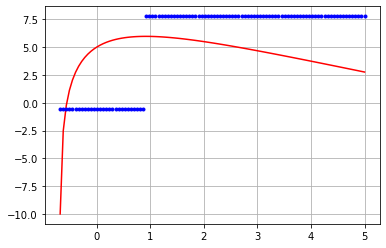

In [180]:
plt.plot(X, F, 'r')
plt.plot(X, roots, 'bo', markersize=3)
plt.grid()
plt.show()

In [198]:
def FindRealRoots(f, a, b, n, eps=10e-4):
    roots = []
    rounded_roots = set()
    precision = int(-np.log10(eps))
    kmax = precision ** 2
    h0 = 0.1
    X = np.linspace(a, b, n)
    F = np.vectorize(f)(X)
    for i, x in np.ndenumerate(X):
        if not np.isnan(F[i]):
            k = precision
            while k < kmax:
                root = ComplexNewtonRootFinder(f=f, z0=x, eps=eps, h=h0**k)
                if root is None:
                    k += 1
                    continue
                else:
                    root = root.real
                    break
            if root is not None:
                rounded_root = round(root, precision - 1)
                if rounded_root in rounded_roots:
                    continue
                else:
                    roots.append(root)
                    rounded_roots.add(rounded_root)
    return roots

In [195]:
FindRealRoots(lambda x: 4*np.log(2-np.exp(-x))-x+5, -5, 5, 1000, 10e-4)

C:\Users\rouol\AppData\Local\Temp/ipykernel_7296/741611277.py:1: RuntimeWarning:

invalid value encountered in log

C:\Users\rouol\AppData\Local\Temp/ipykernel_7296/741611277.py:1: RuntimeWarning:

overflow encountered in exp



[-0.5601586627412486, 7.7725887106076925]

In [196]:
ComplexNewtonRootFinder(lambda x: np.log(x**2+3*x+1)-np.cos(2*x+1), -5)

-3.4375003195566403

In [199]:
FindRealRoots(lambda x: np.log(x**2+3*x+1)-np.cos(2*x+1), -5, 0, 2, 10e-4)

[-3.4375003195566407, 0.1215834697459549]

In [3]:
def ComplexModulus(z):
    return math.sqrt((z.real)**2+(z.imag)**2)

In [100]:
n = 100
D = 1
R = np.linspace(-D, D, n)
I = np.linspace(-D, D, n)
d = np.zeros((n, n))
image = np.zeros((n,n,3), dtype=np.uint8)
maxr = 0
minr = 0
maxi = 0
mini = 0
maxit = 0
for ri, r in np.ndenumerate(R):
    for ii, i in np.ndenumerate(I):
        #d[i][j] = ComplexNumericalDifferentiation(lambda z: z**5 + 1, complex(i, j)).real
        root, it = ComplexNewtonRootFinder(lambda z: z**5+1, complex(r, i), h=10e-5, log_it=True)
        d[ri][ii] = root.real * root.imag
        '''
        if root.real > maxr:
            maxr = root.real
        if root.real < minr:
            minr = root.real
        if root.imag > maxr:
            maxi = root.imag
        if root.imag < mini:
            mini = root.imag
        if it > maxit:
            maxit = it
        image[ri][ii] = 255 * it / 112 *  np.asarray([255 * (root.real - minr) / (-minr + maxr), 255 * (root.imag - mini) / (-mini + maxi), 255 * (root.imag * root.real - minm) / (-minm + maxm)])
        '''
        #image[ri][ii] = np.asarray([255 * root.real * root.imag / 1.1944796092141914, 255 * root.real * root.imag / -1.1944796092141914, 255 * it / 112])
        #d[ri][ii] = ComplexModulus(ComplexNewtonRootFinder(lambda z: z**5+1, complex(r, i)))#.real

In [101]:
fig = go.Figure(data=
    go.Contour(
        x=R,
        y=I,
        z=d,
        line_smoothing=0.85,
        colorscale='rainbow',
        colorbar=dict(
            title='', # title here
            titleside='right',
            titlefont=dict(
                size=14,
                family='Arial, sans-serif')),
        contours=dict(
            coloring ='heatmap',
            showlabels = False, # show labels on contours
            #labelfont = dict( # label font properties
            #    size = 12,
            #    color = 'black',
            #)
        )))

fig.update_layout(
    autosize=False,
    width=600,
    height=600
)

fig.update_xaxes(
    constrain="domain",  # meanwhile compresses the xaxis by decreasing its "domain"
)
'''
fig.update_yaxes(
    scaleanchor = "x",
    scaleratio = 1,
)
'''

fig.show()


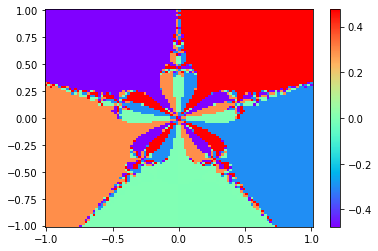

<Figure size 36000x36000 with 0 Axes>

In [102]:
fig, ax = plt.subplots()
c = ax.pcolormesh(R, I, d, cmap='rainbow', shading='auto')
#ax.set_title('pcolormesh')
fig.colorbar(c, ax=ax)
plt.figure(figsize=(500, 500))
plt.show()

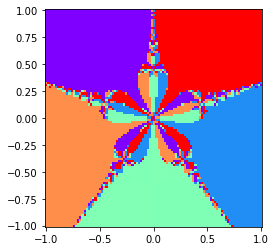

<Figure size 36000x36000 with 0 Axes>

In [103]:
fig, ax = plt.subplots()
c = ax.pcolormesh(R, I, d, cmap='rainbow', shading='auto')
#ax.set_title('pcolormesh')
#fig.colorbar(c, ax=ax)
plt.figure(figsize=(500, 500))
ax.set_aspect('equal', adjustable='box')
plt.show()

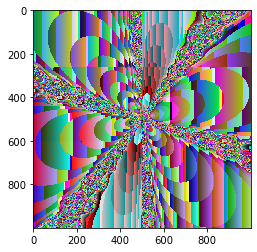

<Figure size 7200x7200 with 0 Axes>

In [101]:
plt.imshow(image, interpolation='nearest')
plt.figure(figsize=(100, 100))
plt.show()

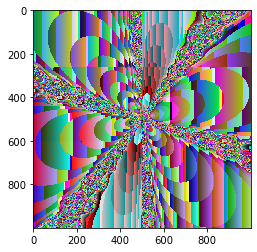

<Figure size 7200x7200 with 0 Axes>

In [100]:
plt.imshow(image, interpolation='nearest')
plt.figure(figsize=(100, 100))
plt.show()

In [103]:
from PIL import Image
img = Image.fromarray(image, 'RGB')
img.save('qm.png')
img.show()